Initializing environment...

[STEP 1] Loading Dataset...
   Success! Loaded 44898 total news articles.

[STEP 2] Cleaning Text Data...

[STEP 3] Converting Text to Numbers (TF-IDF)...

[STEP 4] Training Logistic Regression Model...

[STEP 5] Evaluating Performance...
   Training Accuracy: 99.02%
   Test Accuracy:     98.70%


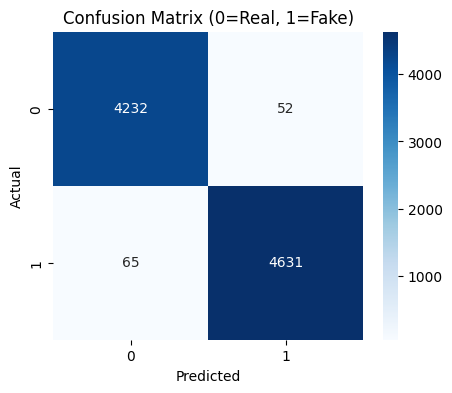


------------------------------------------------
 SYSTEM READY - TESTING EXAMPLES
------------------------------------------------

Scanning: 'Government to lower taxes for small businesses next year.'
>>> RESULT: REAL News ✅

Scanning: 'Flying cows discovered in New York City subway.'
>>> RESULT: FAKE News ⚠️


In [2]:
# ========================================================
# PROJECT: Fake News Detection System (NLP)
# ALGORITHM: Logistic Regression with TF-IDF Vectorization
# ========================================================

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. SETUP & CONFIGURATION
# --------------------------------------------------------
print("Initializing environment...")
nltk.download('stopwords', quiet=True)
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# 2. DATA LOADING (With Auto-Fallback)
# --------------------------------------------------------
def load_data():
    print("\n[STEP 1] Loading Dataset...")
    try:
        # Try to load the real big datasets
        true_df = pd.read_csv('True.csv')
        fake_df = pd.read_csv('Fake.csv')

        # Label: 0 = Real, 1 = Fake
        true_df['label'] = 0
        fake_df['label'] = 1

        # Combine
        df = pd.concat([fake_df, true_df], axis=0)
        print(f"   Success! Loaded {len(df)} total news articles.")

    except FileNotFoundError:
        # Fallback if user hasn't uploaded files yet
        print("   ⚠️ files 'True.csv'/'Fake.csv' not found.")
        print("   ⚠️ Switching to INTERNAL DEMO DATASET so code can run...")

        data = {
            'text': [
                "The US Congress passed a new budget bill yesterday.", # Real
                "Scientists discover water on Mars surface.", # Real
                "Aliens landed in Texas and are demanding free tacos.", # Fake
                "The earth is actually a flat disc says top expert.", # Fake
                "Stock market hits record high amid tech rally.", # Real
                "Drinking glitter cures all diseases instantly.", # Fake
                "President announces new infrastructure plan.", # Real
                "Man grows wings after eating spicy chicken.", # Fake
            ],
            'label': [0, 0, 1, 1, 0, 1, 0, 1]
        }
        df = pd.DataFrame(data)

    # Shuffle Data
    df = df.sample(frac=1).reset_index(drop=True)
    return df

df = load_data()

# 3. PREPROCESSING
# --------------------------------------------------------
def preprocess_text(content):
    # Check if content is string, if not return empty
    if not isinstance(content, str):
        return ""

    # A. Remove non-letters
    cleaned = re.sub('[^a-zA-Z]', ' ', content)
    # B. Lowercase
    cleaned = cleaned.lower()
    # C. Split
    words = cleaned.split()
    # D. Stemming & Stopword Removal
    cleaned_words = [stemmer.stem(w) for w in words if w not in stop_words]

    return ' '.join(cleaned_words)

print("\n[STEP 2] Cleaning Text Data...")
# If dataset is large, this takes time. If dummy, it's instant.
if 'text' in df.columns:
    df['content'] = df['text'].apply(preprocess_text)
else:
    # Fallback if column name is 'title' instead of 'text'
    df['content'] = df['title'].apply(preprocess_text)

# 4. VECTORIZATION & SPLITTING
# --------------------------------------------------------
print("\n[STEP 3] Converting Text to Numbers (TF-IDF)...")
X = df['content'].values
Y = df['label'].values

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X_transformed = vectorizer.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.2, stratify=Y, random_state=42)

# 5. MODEL TRAINING
# --------------------------------------------------------
print("\n[STEP 4] Training Logistic Regression Model...")
model = LogisticRegression()
model.fit(X_train, Y_train)

# 6. EVALUATION
# --------------------------------------------------------
print("\n[STEP 5] Evaluating Performance...")
# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(train_pred, Y_train)
test_acc = accuracy_score(test_pred, Y_test)

print(f"   Training Accuracy: {train_acc*100:.2f}%")
print(f"   Test Accuracy:     {test_acc*100:.2f}%")

# Visualization: Confusion Matrix
if len(df) > 10: # Only show graph if we have enough data
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(Y_test, test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (0=Real, 1=Fake)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 7. PREDICTION SYSTEM
# --------------------------------------------------------
def check_news(news_text):
    print(f"\nScanning: '{news_text}'")
    processed_txt = preprocess_text(news_text)
    vectorized_input = vectorizer.transform([processed_txt])
    prediction = model.predict(vectorized_input)

    if prediction[0] == 0:
        print(">>> RESULT: REAL News ✅")
    else:
        print(">>> RESULT: FAKE News ⚠️")

print("\n------------------------------------------------")
print(" SYSTEM READY - TESTING EXAMPLES")
print("------------------------------------------------")

# Test Cases
check_news("Government to lower taxes for small businesses next year.")
check_news("Flying cows discovered in New York City subway.")